In [ ]:
# Group 6
# Project Title: Prediction of Ovarian Cancer Prognosis
#                Using Deep Neural Network (DNN)
#
# Members Name: 1) AISYAH BINTI MOHD NADZRI (A21EC0011)
#               2) THUVAARITHA A/P SIVARAJAH (A21EC0137)
#
# This notebook contains materials for Group 6's
# Prediction of Ovarian Cancer Prognosis Using
# Deep Neural Network (DNN) Progress 2

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# 3.1: Importing Dataset

# GitHub raw URL for the CSV file
url = 'https://raw.githubusercontent.com/martuzaiu/Ovarian_Cancer_Project/main/ovariantotal.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(url)

# Display the first few rows of the DataFrame
df.head()


,AFP,AG,Age,ALB,ALP,ALT,AST,BASO#,BASO%,BUN,...,PCT,PDW,PHOS,PLT,RBC,RDW,TBIL,TP,UA,TYPE
0,3.58,19.36,47,45.4,56,11,24,0.01,0.30,5.35,...,0.09,13.4,1.46,74,2.64,13.7,5.5,73.9,396.4,0
1,34.24,23.98,61,39.9,95,9,13,0.02,0.30,3.21,...,0.30,11.2,1.09,304,4.89,12.7,6.8,72.0,119.2,0
2,1.50,18.40,39,45.4,77,9,18,0.03,0.60,3.80,...,0.13,15.2,0.97,112,4.62,12.0,14.8,77.9,209.2,0
3,2.75,16.60,45,39.2,26,16,17,0.05,0.74,5.27,...,0.25,17.4,1.25,339,4.01,14.6,10.9,66.1,215.6,0
4,2.36,19.97,45,35.0,47,21,27,0.01,0.10,4.89,...,0.28,11.9,0.94,272,4.40,13.4,5.3,66.5,206.0,0


In [ ]:
# 3.1.0 Understanding the Data

# a) To display the number of rows and columns in the DataFrame
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])


Number of rows: 349
Number of columns: 50


In [ ]:
# 3.1.0 Understanding the Data

# b) To display the data types of each column in the DataFrame
print(df.dtypes)

AFP          float64
AG           float64
Age            int64
ALB          float64
ALP            int64
ALT            int64
AST            int64
BASO#        float64
BASO%        float64
BUN          float64
Ca           float64
CA125        float64
CA19-9       float64
CA72-4       float64
CEA          float64
CL           float64
CO2CP        float64
CREA         float64
DBIL         float64
EO#          float64
EO%          float64
GGT            int64
GLO          float64
GLU.         float64
HCT          float64
HE4          float64
HGB          float64
IBIL         float64
K            float64
LYM#         float64
LYM%         float64
MCH          float64
MCV          float64
Menopause      int64
Mg           float64
MONO#        float64
MONO%        float64
MPV          float64
Na           float64
NEU          float64
PCT          float64
PDW          float64
PHOS         float64
PLT            int64
RBC          float64
RDW          float64
TBIL         float64
TP           

In [ ]:
# 3.2 Data Wrangling

# 3.2.0 Identifying and handling missing values

# Identify missing values in the DataFrame
missing_values = df.isnull().sum()

# Display the count of missing values for each column
print("Missing values in the dataset:")
print(missing_values)

# Check if there are any missing values
if missing_values.sum() == 0:
    print("\nThere are no missing values in the dataset.")
else:
    print("\nThere are missing values in the dataset.")

Missing values in the dataset:
AFP          0
AG           0
Age          0
ALB          0
ALP          0
ALT          0
AST          0
BASO#        0
BASO%        0
BUN          0
Ca           0
CA125        0
CA19-9       0
CA72-4       0
CEA          0
CL           0
CO2CP        0
CREA         0
DBIL         0
EO#          0
EO%          0
GGT          0
GLO          0
GLU.         0
HCT          0
HE4          0
HGB          0
IBIL         0
K            0
LYM#         0
LYM%         0
MCH          0
MCV          0
Menopause    0
Mg           0
MONO#        0
MONO%        0
MPV          0
Na           0
NEU          0
PCT          0
PDW          0
PHOS         0
PLT          0
RBC          0
RDW          0
TBIL         0
TP           0
UA           0
TYPE         0
dtype: int64

There are no missing values in the dataset.


In [ ]:
# 3.2.1 Data Formatting
# a) To change original column names with specific column names

import pandas as pd

# Load the dataset from the given URL
url = 'https://raw.githubusercontent.com/martuzaiu/Ovarian_Cancer_Project/main/ovariantotal.csv'
df = pd.read_csv(url)

# Display the original column names
print("Original Column Names:")
print(df.columns)

# Rename specific columns
column_mapping = {
    'AFP': 'Alpha-Fetoprotein',
    'AG': 'Anion Gap',
    'ALB': 'Albumin',
    'ALP': 'Alkaline Phosphatase',
    'ALT': 'Alanine Aminotransferase',
    'AST': 'Aspartate Aminotransferase',
    'BASO#': 'Basophil Cell Count',
    'BASO%': 'Basophil Cell Ratio',
    'BUN': 'Blood Urea Nitrogen',
    'Ca': 'Calcium',
    'CA125': 'Carbohydrate Antigen 125',
    'CA19-9': 'Carbohydrate Antigen 19-9',
    'CA72-4': 'Carbohydrate Antigen 72-4',
    'CEA': 'Carcinoembryonic Antigen',
    'CL': 'Chlorine',
    'COA2CP': 'Carban Dioxide-Combining Power',
    'CREA': 'Creatinine',
    'DBIL': 'Direct Bilirubin',
    'EO#': 'Eosinophil Count',
    'EO%': 'Eosinophil Ratior6',
    'GGT': 'Gama Glutamyltransferasey',
    'GLO': 'Globulin',
    'GLU.': 'Glucose',
    'HCT': 'Hematocrit',
    'HE4': 'Human Epididymis Protein 4',
    'HGB': 'Hemoglobin',
    'IBIL': 'Indirect Bilirubin',
    'K': 'Kalium',
    'LYM#': 'Lymphocyte Count',
    'LYM%': 'Lymphocyte Ratio',
    'MCH': 'Mean Corpuscular Hemoglubin',
    'MCV': 'Mean Corpuscular Volume',
    'Mg': 'Magnesium',
    'MONO#': 'Mononuclear Cell Count',
    'MONO%': 'Mononuclear Cell Ratio',
    'MPV': 'Mean Platelet Volume',
    'Na': 'Natrium',
    'NEU': 'Neutrophil Ratio',
    'PCT': 'Thrombocytocrit',
    'PDW': 'Platelet Distribution Width',
    'PHOS': 'Phosphorus',
    'PLT': 'Platelet Count',
    'RBC': 'Red Blood Cell Count',
    'RDW': 'Red Blood Cell Distribution Width',
    'TBIL': 'Total Bilirubin',
    'TP': 'Total Protein',
    'UA': 'Uric Acid',
}

df = df.rename(columns=column_mapping)

# Display the updated column names
print("\nUpdated Column Names:")
print(df.columns)

# Save the formatted DataFrame to a new CSV file
df.to_csv('formatted_ovarian_dataset.csv', index=False)


Original Column Names:
Index(['AFP', 'AG', 'Age', 'ALB', 'ALP', 'ALT', 'AST', 'BASO#', 'BASO%', 'BUN',
       'Ca', 'CA125', 'CA19-9', 'CA72-4', 'CEA', 'CL', 'CO2CP', 'CREA', 'DBIL',
       'EO#', 'EO%', 'GGT', 'GLO', 'GLU.', 'HCT', 'HE4', 'HGB', 'IBIL', 'K',
       'LYM#', 'LYM%', 'MCH', 'MCV', 'Menopause', 'Mg', 'MONO#', 'MONO%',
       'MPV', 'Na', 'NEU', 'PCT', 'PDW', 'PHOS', 'PLT', 'RBC', 'RDW', 'TBIL',
       'TP', 'UA', 'TYPE'],
      dtype='object')

Updated Column Names:
Index(['Alpha-Fetoprotein', 'Anion Gap', 'Age', 'Albumin',
       'Alkaline Phosphatase', 'Alanine Aminotransferase',
       'Aspartate Aminotransferase', 'Basophil Cell Count',
       'Basophil Cell Ratio', 'Blood Urea Nitrogen', 'Calcium',
       'Carbohydrate Antigen 125', 'Carbohydrate Antigen 19-9',
       'Carbohydrate Antigen 72-4', 'Carcinoembryonic Antigen', 'Chlorine',
       'CO2CP', 'Creatinine', 'Direct Bilirubin', 'Eosinophil Count',
       'Eosinophil Ratior6', 'Gama Glutamyltransferasey', 'Glob

In [ ]:
# 3.2.1 Data Formatting
# a.i) To display updated column names

from IPython.display import display

# Display the entire DataFrame
display(df)

,Alpha-Fetoprotein,Anion Gap,Age,Albumin,Alkaline Phosphatase,Alanine Aminotransferase,Aspartate Aminotransferase,Basophil Cell Count,Basophil Cell Ratio,Blood Urea Nitrogen,...,Thrombocytocrit,Platelet Distribution Width,Phosphorus,Platelet Count,Red Blood Cell Count,Red Blood Cell Distribution Width,Total Bilirubin,Total Protein,Uric Acid,TYPE
0,3.58,19.36,47,45.4,56,11,24,0.01,0.30,5.35,...,0.09,13.4,1.46,74,2.64,13.7,5.5,73.9,396.4,0
1,34.24,23.98,61,39.9,95,9,13,0.02,0.30,3.21,...,0.30,11.2,1.09,304,4.89,12.7,6.8,72.0,119.2,0
2,1.50,18.40,39,45.4,77,9,18,0.03,0.60,3.80,...,0.13,15.2,0.97,112,4.62,12.0,14.8,77.9,209.2,0
3,2.75,16.60,45,39.2,26,16,17,0.05,0.74,5.27,...,0.25,17.4,1.25,339,4.01,14.6,10.9,66.1,215.6,0
4,2.36,19.97,45,35.0,47,21,27,0.01,0.10,4.89,...,0.28,11.9,0.94,272,4.40,13.4,5.3,66.5,206.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,2.09,20.91,52,48.6,65,40,30,0.00,0.00,4.29,...,0.22,10.8,0.99,219,4.56,11.9,10.7,80.4,241.5,1
345,2.00,12.14,37,46.1,49,9,20,0.00,0.00,3.12,...,0.31,17.3,0.95,262,4.24,17.7,17.2,73.5,240.5,1
346,2.83,19.23,59,45.8,83,9,16,0.02,0.60,4.38,...,0.21,10.4,1.00,221,4.89,11.6,13.8,68.4,209.5,1
347,1.84,27.22,30,47.8,64,26,22,0.03,0.30,3.61,...,0.42,13.4,1.31,398,5.35,12.5,11.3,76.0,285.7,1


In [ ]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Load the dataset from the given URL
url = 'https://raw.githubusercontent.com/martuzaiu/Ovarian_Cancer_Project/main/ovariantotal.csv'
df = pd.read_csv(url)

# Assuming 'TYPE' is your target variable, you may need to adjust this based on your dataset
X = df.drop(columns=['TYPE'])  # Features
y = df['TYPE']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose a machine learning model (e.g., Logistic Regression)
model = LogisticRegression()

# Create RFE model and select the number of features to retain (adjust as needed)
num_features_to_select = 10
rfe = RFE(model, n_features_to_select=num_features_to_select)

# Fit the RFE model to your data
rfe.fit(X_train, y_train)

# Get the selected features
selected_features = X_train.columns[rfe.support_]

# Display the selected features
print("\nSelected Features:")
print(selected_features)

# Display the ranking of features from the best to the least important
ranking_results = pd.DataFrame({'Feature': X_train.columns, 'Ranking': rfe.ranking_})
ranking_results = ranking_results.sort_values(by='Ranking')

print("\nFeature Rankings:")
print(ranking_results)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c


Selected Features:
Index(['AST', 'CEA', 'DBIL', 'EO%', 'GLU.', 'K', 'MCH', 'MCV', 'Menopause',
       'MPV'],
      dtype='object')

Feature Rankings:
      Feature  Ranking
31        MCH        1
20        EO%        1
23       GLU.        1
18       DBIL        1
14        CEA        1
33  Menopause        1
37        MPV        1
28          K        1
32        MCV        1
6         AST        1
34         Mg        2
8       BASO%        3
5         ALT        4
22        GLO        5
38         Na        6
45        RDW        7
25        HE4        8
21        GGT        9
39        NEU       10
30       LYM%       11
13     CA72-4       12
46       TBIL       13
9         BUN       14
15         CL       15
2         Age       16
19        EO#       17
0         AFP       18
47         TP       19
16      CO2CP       20
4         ALP       21
26        HGB       22
12     CA19-9       23
48         UA       24
27       IBIL       25
17       CREA       26
3         ALB       

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset from the given URL
url = 'https://raw.githubusercontent.com/martuzaiu/Ovarian_Cancer_Project/main/ovariantotal.csv'
df = pd.read_csv(url)

# Assuming 'TYPE' is your target variable, you may need to adjust this based on your dataset
X = df.drop(columns=['TYPE'])  # Features
y = df['TYPE']  # Target variable

# Selected features and their rankings
selected_features_info = [
    {'Feature': 'MCH', 'Ranking': 1},
    {'Feature': 'EO%', 'Ranking': 1},
    {'Feature': 'GLU.', 'Ranking': 1},
    {'Feature': 'DBIL', 'Ranking': 1},
    {'Feature': 'CEA', 'Ranking': 1},
    {'Feature': 'Menopause', 'Ranking': 1},
    {'Feature': 'MPV', 'Ranking': 1},
    {'Feature': 'K', 'Ranking': 1},
    {'Feature': 'MCV', 'Ranking': 1},
    {'Feature': 'AST', 'Ranking': 1},
    {'Feature': 'Mg', 'Ranking': 2},
    {'Feature': 'BASO%', 'Ranking': 3},
]

# Extract selected feature names
selected_features = [info['Feature'] for info in selected_features_info]

# Create a new DataFrame with only the selected features
df_selected_features = df[selected_features + ['TYPE']]  # Include the target variable 'TYPE'

# Set pandas options to display all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Display the new DataFrame with selected features
print("\nDataFrame with Selected Features:")
print(df_selected_features)

# Reset pandas options to the default values
pd.reset_option('display.max_columns')
pd.reset_option('display.max_rows')



DataFrame with Selected Features:
       MCH   EO%   GLU.   DBIL     CEA  Menopause    MPV     K    MCV  AST  \
0    33.70  1.00   4.67   2.00    1.40          0  11.70  5.36  103.4   24   
1    26.20  0.50  10.50   2.60    2.46          1  10.00  4.38   85.3   13   
2    28.40  0.60   4.64   4.70    0.77          0  11.40  4.30   84.6   18   
3    30.60  0.07   4.76   2.90    0.82          1   7.38  4.70   92.6   17   
4    27.70  1.60   4.07   2.20    0.42          0  10.40  4.77   87.0   27   
5    21.80  0.19   7.52   5.90    1.33          0   9.49  4.89   69.0   32   
6    29.70  1.50   7.10   3.13    3.31          0  12.10  4.20   90.7   19   
7    30.40  3.90   5.67   2.30    3.45          1  12.00  4.75   94.8   23   
8    18.10  0.80   4.91   2.40    0.64          0   9.10  4.43   61.8   47   
9    29.10  0.23   4.09   2.00    0.66          0   6.55  4.86   90.2   12   
10   24.90  0.00   3.71   2.10    0.38          0  11.60  4.74   82.7   21   
11   30.10  0.20   5.50   1.9

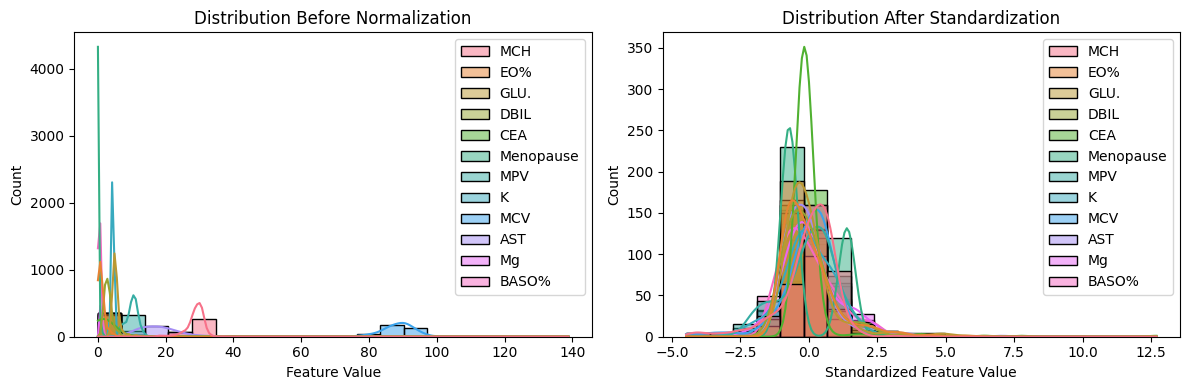

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load the dataset from the given URL
url = 'https://raw.githubusercontent.com/martuzaiu/Ovarian_Cancer_Project/main/ovariantotal.csv'
df = pd.read_csv(url)

# Assuming 'TYPE' is your target variable, you may need to adjust this based on your dataset
X = df.drop(columns=['TYPE'])  # Features
y = df['TYPE']  # Target variable

# Selected features and their rankings
selected_features_info = [
    {'Feature': 'MCH', 'Ranking': 1},
    {'Feature': 'EO%', 'Ranking': 1},
    {'Feature': 'GLU.', 'Ranking': 1},
    {'Feature': 'DBIL', 'Ranking': 1},
    {'Feature': 'CEA', 'Ranking': 1},
    {'Feature': 'Menopause', 'Ranking': 1},
    {'Feature': 'MPV', 'Ranking': 1},
    {'Feature': 'K', 'Ranking': 1},
    {'Feature': 'MCV', 'Ranking': 1},
    {'Feature': 'AST', 'Ranking': 1},
    {'Feature': 'Mg', 'Ranking': 2},
    {'Feature': 'BASO%', 'Ranking': 3},
]

# Extract selected feature names
selected_features = [info['Feature'] for info in selected_features_info]

# Create a new DataFrame with only the selected features
df_selected_features = df[selected_features + ['TYPE']]  # Include the target variable 'TYPE'

# Separate the features and target variable
X_selected = df_selected_features[selected_features]

# Standardize the selected features
scaler = StandardScaler()
X_selected_standardized = scaler.fit_transform(X_selected)

# Create a DataFrame with standardized features
df_selected_standardized = pd.DataFrame(X_selected_standardized, columns=selected_features)

# Visualize the distribution before and after normalization
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Before normalization
sns.histplot(data=X_selected, bins=20, kde=True, ax=axes[0])
axes[0].set_title('Distribution Before Normalization')
axes[0].set_xlabel('Feature Value')

# After normalization
sns.histplot(data=df_selected_standardized, bins=20, kde=True, ax=axes[1])
axes[1].set_title('Distribution After Standardization')
axes[1].set_xlabel('Standardized Feature Value')

plt.tight_layout()
plt.show()


In [ ]:
# 3.2.3 Data Binning
# Age Column
import pandas as pd

# GitHub raw URL for the CSV file
url = 'https://raw.githubusercontent.com/martuzaiu/Ovarian_Cancer_Project/main/ovariantotal.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(url)

# Choosing the 'Age' column for binning
column_to_bin = 'Age'

# Defining the bin edges
bin_edges = [0, 20, 40, 60, 80, 100]

# Defining bin labels
bin_labels = ['0-20', '21-40', '41-60', '61-80', '81-100']

# Create a new column with bin labels
df['Age_Bin'] = pd.cut(df[column_to_bin], bins=bin_edges, labels=bin_labels, include_lowest=True)

# Display the binned data and original data for the age column only
display(df[['Age', 'Age_Bin']])


,Age,Age_Bin
0,47,41-60
1,61,61-80
2,39,21-40
3,45,41-60
4,45,41-60
...,...,...
344,52,41-60
345,37,21-40
346,59,41-60
347,30,21-40


In [ ]:
# 3.2.3 Data Binning
# Hemoglobin and Platelet Count Columns
import pandas as pd

# GitHub raw URL for the CSV file
url = 'https://raw.githubusercontent.com/martuzaiu/Ovarian_Cancer_Project/main/ovariantotal.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(url)

# Convert 'HGB' unit from g/L to g/dL
df['HGB_g_dL'] = df['HGB'] / 10

# Define bin edges for Hemoglobin (HGB) in g/dL
hgb_bin_edges = [0, 12, 16, 25]  # To consider 12-16 g/dL as 'Normal'

# Bin labels for Hemoglobin (HGB)
hgb_bin_labels = ['Low', 'Normal', 'High']

# Create a new column with bin labels for Hemoglobin (using the converted column)
df['HGB_Bin'] = pd.cut(df['HGB_g_dL'], bins=hgb_bin_edges, labels=hgb_bin_labels, include_lowest=True)

# Define bin edges and labels for Platelet Count (PLT)
plt_bin_edges = [0, 150, 450, 1000]  # You can adjust these values based on your requirements
plt_bin_labels = ['Low', 'Normal', 'High']

# Create a new column with bin labels for Platelet Count
df['PLT_Bin'] = pd.cut(df['PLT'], bins=plt_bin_edges, labels=plt_bin_labels, include_lowest=True)

# Display the binned data
display(df[['HGB_g_dL', 'HGB_Bin', 'PLT', 'PLT_Bin']])

,HGB_g_dL,HGB_Bin,PLT,PLT_Bin
0,8.9,Low,74,Low
1,12.8,Normal,304,Normal
2,13.1,Normal,112,Low
3,12.3,Normal,339,Normal
4,12.2,Normal,272,Normal
...,...,...,...,...
344,14.2,Normal,219,Normal
345,8.0,Low,262,Normal
346,14.4,Normal,221,Normal
347,15.4,Normal,398,Normal


In [ ]:
# Hemoglobin and Platelet Count Columns
import pandas as pd

# GitHub raw URL for the CSV file
url = 'https://raw.githubusercontent.com/martuzaiu/Ovarian_Cancer_Project/main/ovariantotal.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(url)

# Convert 'HGB' unit from g/L to g/dL
df['HGB_g_dL'] = df['HGB'] / 10

# Define bin edges for Hemoglobin (HGB) in g/dL
hgb_bin_edges = [0, 12, 16, 25]  # To consider 12-16 g/dL as 'Normal'

# Bin labels for Hemoglobin (HGB)
hgb_bin_labels = ['Low', 'Normal', 'High']

# Create a new column with bin labels for Hemoglobin (using the converted column)
df['HGB_Bin'] = pd.cut(df['HGB_g_dL'], bins=hgb_bin_edges, labels=hgb_bin_labels, include_lowest=True)

# Define bin edges and labels for Platelet Count (PLT)
plt_bin_edges = [0, 150, 450, 1000]  # You can adjust these values based on your requirements
plt_bin_labels = ['Low', 'Normal', 'High']

# Create a new column with bin labels for Platelet Count
df['PLT_Bin'] = pd.cut(df['PLT'], bins=plt_bin_edges, labels=plt_bin_labels, include_lowest=True)

# 3.2.4 Indicator Variables

# Example assuming the columns are named 'HGB_Bin' and 'PLT_Bin'
hgb_indicator = pd.get_dummies(df['HGB_Bin'], prefix='HGB')
plt_indicator = pd.get_dummies(df['PLT_Bin'], prefix='PLT')

# Concatenate indicator variables back to the original DataFrame
df = pd.concat([df, hgb_indicator, plt_indicator], axis=1).drop(['HGB_Bin', 'PLT_Bin'], axis=1)

# Display the data with indicator variables
display(df[['HGB_g_dL', 'HGB_Low', 'HGB_Normal', 'HGB_High', 'PLT_Low', 'PLT_Normal', 'PLT_High']])

,HGB_g_dL,HGB_Low,HGB_Normal,HGB_High,PLT_Low,PLT_Normal,PLT_High
0,8.9,1,0,0,1,0,0
1,12.8,0,1,0,0,1,0
2,13.1,0,1,0,1,0,0
3,12.3,0,1,0,0,1,0
4,12.2,0,1,0,0,1,0
...,...,...,...,...,...,...,...
344,14.2,0,1,0,0,1,0
345,8.0,1,0,0,0,1,0
346,14.4,0,1,0,0,1,0
347,15.4,0,1,0,0,1,0


In [ ]:
# 3.2.3 Data Binning
# CA125 column

import pandas as pd

# GitHub raw URL for the CSV file
url = 'https://raw.githubusercontent.com/martuzaiu/Ovarian_Cancer_Project/main/ovariantotal.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(url)

# Choosing the 'CA125' column for binning
column_to_bin = 'CA125'

# Defining the bin edges
bin_edges = [0, 35, float('inf')]  # Values below 35 are normal, anything above is high

# Defining bin labels
bin_labels = ['Normal', 'High']

# Create a new column with bin labels
df['CA125_Bin'] = pd.cut(df[column_to_bin], bins=bin_edges, labels=bin_labels, include_lowest=True)

# Display the binned data and original data for the 'CA125' column only
display(df[['CA125', 'CA125_Bin']])


,CA125,CA125_Bin
0,15.36,Normal
1,2444.00,High
2,56.08,High
3,2555.00,High
4,1391.00,High
...,...,...
344,50.80,High
345,21.93,Normal
346,51.33,High
347,53.87,High


In [ ]:
# 3.2.3 Data Binning
# MCH column

import pandas as pd

# GitHub raw URL for the CSV file
url = 'https://raw.githubusercontent.com/martuzaiu/Ovarian_Cancer_Project/main/ovariantotal.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(url)

# Choosing the 'MCH' column for binning
column_to_bin = 'MCH'

# Defining the bin edges
bin_edges = [0, 27, 31, float('inf')]  # Values between 27 and 31 are normal, below 27 is low, and above 31 is high

# Defining bin labels
bin_labels = ['Low', 'Normal', 'High']

# Create a new column with bin labels
df['MCH_Bin'] = pd.cut(df[column_to_bin], bins=bin_edges, labels=bin_labels, include_lowest=True)

# Display the binned data and original data for the 'MCH' column only
display(df[['MCH', 'MCH_Bin']])


,MCH,MCH_Bin
0,33.7,High
1,26.2,Low
2,28.4,Normal
3,30.6,Normal
4,27.7,Normal
...,...,...
344,31.1,High
345,18.9,Low
346,29.4,Normal
347,28.8,Normal


In [ ]:
# 3.2.4 Indicator Variable
# indicator variable for the 'TYPE' variable

import pandas as pd

# GitHub raw URL for the CSV file
url = 'https://raw.githubusercontent.com/martuzaiu/Ovarian_Cancer_Project/main/ovariantotal.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(url)

# Assuming df is your DataFrame
target_variable = 'TYPE'

# Create indicator variables for 'TYPE'
indicator_variables = pd.get_dummies(df[target_variable], prefix=target_variable)

# Concatenate the indicator variables with the original DataFrame
df_with_indicators = pd.concat([df, indicator_variables], axis=1)

# Display the entire DataFrame
print(df_with_indicators)


       AFP     AG  Age   ALB  ALP  ALT  AST  BASO#  BASO%   BUN  ...  PHOS  \
0     3.58  19.36   47  45.4   56   11   24   0.01   0.30  5.35  ...  1.46   
1    34.24  23.98   61  39.9   95    9   13   0.02   0.30  3.21  ...  1.09   
2     1.50  18.40   39  45.4   77    9   18   0.03   0.60  3.80  ...  0.97   
3     2.75  16.60   45  39.2   26   16   17   0.05   0.74  5.27  ...  1.25   
4     2.36  19.97   45  35.0   47   21   27   0.01   0.10  4.89  ...  0.94   
..     ...    ...  ...   ...  ...  ...  ...    ...    ...   ...  ...   ...   
344   2.09  20.91   52  48.6   65   40   30   0.00   0.00  4.29  ...  0.99   
345   2.00  12.14   37  46.1   49    9   20   0.00   0.00  3.12  ...  0.95   
346   2.83  19.23   59  45.8   83    9   16   0.02   0.60  4.38  ...  1.00   
347   1.84  27.22   30  47.8   64   26   22   0.03   0.30  3.61  ...  1.31   
348   1.61  13.00   39  44.9   68    7   13   0.01   0.20  4.38  ...  1.10   

     PLT   RBC   RDW  TBIL    TP     UA  TYPE  TYPE_0  TYPE_1  

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset from the given URL
url = 'https://raw.githubusercontent.com/martuzaiu/Ovarian_Cancer_Project/main/ovariantotal.csv'
df = pd.read_csv(url)

# Assuming 'TYPE' is your target variable, you may need to adjust this based on your dataset
X = df.drop(columns=['TYPE'])  # Features
y = df['TYPE']  # Target variable

# Selected features and their rankings
selected_features_info = [
    {'Feature': 'MCH', 'Ranking': 1},
    {'Feature': 'EO%', 'Ranking': 1},
    {'Feature': 'GLU.', 'Ranking': 1},
    {'Feature': 'DBIL', 'Ranking': 1},
    {'Feature': 'CEA', 'Ranking': 1},
    {'Feature': 'Menopause', 'Ranking': 1},
    {'Feature': 'MPV', 'Ranking': 1},
    {'Feature': 'K', 'Ranking': 1},
    {'Feature': 'MCV', 'Ranking': 1},
    {'Feature': 'AST', 'Ranking': 1},
    {'Feature': 'Mg', 'Ranking': 2},
    {'Feature': 'BASO%', 'Ranking': 3},
]

# Extract selected feature names
selected_features = [info['Feature'] for info in selected_features_info]

# Create a new DataFrame with only the selected features
df_selected_features = df[selected_features + ['TYPE']]  # Include the target variable 'TYPE'

# Standardize the selected features
scaler = StandardScaler()
X_selected_standardized = scaler.fit_transform(df_selected_features[selected_features])

# Create a DataFrame with standardized features
df_selected_standardized = pd.DataFrame(X_selected_standardized, columns=selected_features)

# Descriptive statistics for the standardized features
statistics_selected_features = df_selected_standardized.describe()

# Transpose the DataFrame for better readability
statistics_selected_features = statistics_selected_features.transpose()

# Descriptive statistics for the 'TYPE' variable
statistics_type = df['TYPE'].describe().to_frame()

# Display the descriptive statistics for selected features
print("\nDescriptive Statistics for Selected Features:")
print(statistics_selected_features)

# Display the descriptive statistics for 'TYPE' variable
print("\nDescriptive Statistics for 'TYPE' Variable:")
print(statistics_type)



Descriptive Statistics for Selected Features:
           count          mean       std       min       25%       50%  \
MCH        349.0 -4.275472e-16  1.001436 -4.317531 -0.302924  0.203774   
EO%        349.0  0.000000e+00  1.001436 -0.987566 -0.722830 -0.281602   
GLU.       349.0  6.107817e-16  1.001436 -1.453667 -0.555928 -0.210010   
DBIL       349.0 -2.952112e-16  1.001436 -1.578190 -0.657613 -0.161918   
CEA        349.0  3.053909e-17  1.001436 -0.291464 -0.230531 -0.178971   
Menopause  349.0  4.071878e-17  1.001436 -0.719299 -0.719299 -0.719299   
MPV        349.0  8.016510e-16  1.001436 -2.876123 -0.542641  0.150473   
K          349.0  1.862884e-15  1.001436 -3.297205 -0.596744 -0.041509   
MCV        349.0 -2.392228e-16  1.001436 -4.486953 -0.409442  0.154117   
AST        349.0 -1.017970e-16  1.001436 -1.447721 -0.610415 -0.131954   
Mg         349.0  6.044194e-16  1.001436 -2.694625 -0.669769 -0.102809   
BASO%      349.0  2.035939e-17  1.001436 -1.387689 -0.809209 -0.2

In [ ]:
import pandas as pd

# Load the dataset from the given URL
url = 'https://raw.githubusercontent.com/martuzaiu/Ovarian_Cancer_Project/main/ovariantotal.csv'
df = pd.read_csv(url)

# Assuming 'TYPE' is your target variable, you may need to adjust this based on your dataset
X = df.drop(columns=['TYPE'])  # Features
y = df['TYPE']  # Target variable

# Selected features and their rankings
selected_features_info = [
    {'Feature': 'MCH', 'Ranking': 1},
    {'Feature': 'EO%', 'Ranking': 1},
    {'Feature': 'GLU.', 'Ranking': 1},
    {'Feature': 'DBIL', 'Ranking': 1},
    {'Feature': 'CEA', 'Ranking': 1},
    {'Feature': 'Menopause', 'Ranking': 1},
    {'Feature': 'MPV', 'Ranking': 1},
    {'Feature': 'K', 'Ranking': 1},
    {'Feature': 'MCV', 'Ranking': 1},
    {'Feature': 'AST', 'Ranking': 1},
    {'Feature': 'Mg', 'Ranking': 2},
    {'Feature': 'BASO%', 'Ranking': 3},
]

# Extract selected feature names
selected_features = [info['Feature'] for info in selected_features_info]

# Separate rows where 'TYPE' is 0 (malignant ovarian cancer) and include selected features
df_malignant = df[df['TYPE'] == 0][selected_features]

# Separate rows where 'TYPE' is 1 (benign ovarian cancer) and include selected features
df_benign = df[df['TYPE'] == 1][selected_features]

# Set display options to show all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Display the full rows for each DataFrame
print("\nRows with 'TYPE' = 0 (Malignant Ovarian Cancer):")
print(df_malignant)

print("\nRows with 'TYPE' = 1 (Benign Ovarian Cancer):")
print(df_benign)



Rows with 'TYPE' = 0 (Malignant Ovarian Cancer):
       MCH   EO%   GLU.  DBIL     CEA  Menopause    MPV     K    MCV  AST  \
0    33.70  1.00   4.67  2.00    1.40          0  11.70  5.36  103.4   24   
1    26.20  0.50  10.50  2.60    2.46          1  10.00  4.38   85.3   13   
2    28.40  0.60   4.64  4.70    0.77          0  11.40  4.30   84.6   18   
3    30.60  0.07   4.76  2.90    0.82          1   7.38  4.70   92.6   17   
4    27.70  1.60   4.07  2.20    0.42          0  10.40  4.77   87.0   27   
5    21.80  0.19   7.52  5.90    1.33          0   9.49  4.89   69.0   32   
6    29.70  1.50   7.10  3.13    3.31          0  12.10  4.20   90.7   19   
7    30.40  3.90   5.67  2.30    3.45          1  12.00  4.75   94.8   23   
8    18.10  0.80   4.91  2.40    0.64          0   9.10  4.43   61.8   47   
9    29.10  0.23   4.09  2.00    0.66          0   6.55  4.86   90.2   12   
10   24.90  0.00   3.71  2.10    0.38          0  11.60  4.74   82.7   21   
11   30.10  0.20   5.50  1

In [ ]:
# 4.3 ANOVA
import pandas as pd
from scipy.stats import f_oneway

# GitHub raw URL for the CSV file
url = 'https://raw.githubusercontent.com/martuzaiu/Ovarian_Cancer_Project/main/ovariantotal.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(url)

# Choosing the 'Age' column for binning
column_to_bin = 'Age'

# Defining the bin edges
bin_edges = [0, 20, 40, 60, 80, 100]

# Defining bin labels
bin_labels = ['0-20', '21-40', '41-60', '61-80', '81-100']

# Create a new column with bin labels
df['Age_Bin'] = pd.cut(df[column_to_bin], bins=bin_edges, labels=bin_labels, include_lowest=True)

# Specifying the variable to analyze (PLT - Platelet Count)
variable_to_analyze = 'PLT'

# Grouping the data by the 'Age_Bin' and calculating the mean for each group
grouped_data = df.groupby('Age_Bin')[variable_to_analyze].mean()

# Display the mean values for each group
print("Mean values for each group:")
print(grouped_data)

# Performing ANOVA on Platelet Count (PLT)
anova_result = f_oneway(df[df['Age_Bin'] == '0-20'][variable_to_analyze],
                        df[df['Age_Bin'] == '21-40'][variable_to_analyze],
                        df[df['Age_Bin'] == '41-60'][variable_to_analyze],
                        df[df['Age_Bin'] == '61-80'][variable_to_analyze],
                        df[df['Age_Bin'] == '81-100'][variable_to_analyze])

# Display ANOVA results for Platelet Count (PLT)
print("\nANOVA Results for", variable_to_analyze, ":")
print(anova_result)

Mean values for each group:
Age_Bin
0-20      240.700000
21-40     243.992424
41-60     254.269504
61-80     282.938462
81-100    289.000000
Name: PLT, dtype: float64

ANOVA Results for PLT :
F_onewayResult(statistic=1.9486112038615206, pvalue=0.10199340093136981)


In [ ]:
# 4.3 ANOVA
# compare the means of the selected feature among different groups defined by CA125.

from scipy.stats import f_oneway

# Assuming df is your DataFrame
selected_features = ['MCH', 'EO%', 'GLU.', 'DBIL', 'CEA', 'Menopause', 'MPV', 'K', 'MCV', 'AST', 'CA125']

# Create a dictionary to store ANOVA results
anova_results = {}

# Loop through each selected feature
for feature in selected_features[:-1]:  # Exclude 'CA125'
    # Perform ANOVA test
    groups = [df[feature][df['CA125'] == level].dropna() for level in df['CA125'].unique()]
    anova_result = f_oneway(*groups)

    # Store ANOVA result
    anova_results[feature] = anova_result

# Print ANOVA results
for feature, result in anova_results.items():
    print(f"{feature}: p-value = {result.pvalue}")

MCH: p-value = 0.87666358692362
EO%: p-value = 0.3609209389965378
GLU.: p-value = 0.6288784378030444
DBIL: p-value = 0.9996421248437418
CEA: p-value = 1.9879064025506794e-15
Menopause: p-value = 0.45291768655894404
MPV: p-value = 0.0922242771176619
K: p-value = 0.9159157237671235
MCV: p-value = 0.9284105595547069
AST: p-value = 0.6228970470920174


In [ ]:
# 4.3 ANOVA

from scipy.stats import f_oneway

# Assuming df is your DataFrame
feature = 'MCH'
target_variable = 'TYPE'

# Perform ANOVA test
groups = [df[feature][df[target_variable] == level].dropna() for level in df[target_variable].unique()]
anova_result = f_oneway(*groups)

# Print ANOVA result
print(f"{feature} vs {target_variable}: p-value = {anova_result.pvalue}")


MCH vs TYPE: p-value = 0.0017649355345080247


In [ ]:
# 4.4 Correlation
# Correlation between 'MCH' and 'TYPE'

import pandas as pd

# GitHub raw URL for the CSV file
url = 'https://raw.githubusercontent.com/martuzaiu/Ovarian_Cancer_Project/main/ovariantotal.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(url)

# Select the variables you want to calculate correlation for
variable1 = 'MCH'
variable2 = 'TYPE'

# Calculate the correlation coefficient
correlation_coefficient = df[variable1].corr(df[variable2])

# Display the correlation coefficient
print(f'Correlation between {variable1} and {variable2}: {correlation_coefficient}')

Correlation between MCH and TYPE: 0.1668179796355193


In [ ]:
# 4.4 Correlation
# 4.4 Correlation coefficient and the corresponding p-value between each feature and the 'CA125' variable

from scipy.stats import pearsonr

# Assuming df is your DataFrame
selected_features = ['MCH', 'EO%', 'GLU.', 'DBIL', 'CEA', 'Menopause', 'MPV', 'K', 'MCV', 'AST', 'CA125']

# Create a dictionary to store correlation results
correlation_results = {}

# Loop through each selected feature
for feature in selected_features[:-1]:  # Exclude 'CA125'
    # Calculate Pearson correlation coefficient and p-value
    correlation_coefficient, p_value = pearsonr(df[feature], df['CA125'])

    # Store correlation result
    correlation_results[feature] = {'correlation_coefficient': correlation_coefficient, 'p_value': p_value}

# Print correlation results
for feature, result in correlation_results.items():
    print(f"{feature}: correlation_coefficient = {result['correlation_coefficient']}, p-value = {result['p_value']}")


MCH: correlation_coefficient = -0.058408699676361815, p-value = 0.2765160195081166
EO%: correlation_coefficient = -0.12858335824354616, p-value = 0.01623883653714991
GLU.: correlation_coefficient = 0.24238652485560966, p-value = 4.641057695436464e-06
DBIL: correlation_coefficient = -0.11964000295705127, p-value = 0.02541243247990405
CEA: correlation_coefficient = 0.03692584333261083, p-value = 0.4917101313501483
Menopause: correlation_coefficient = 0.3321745352894918, p-value = 1.9541774768864524e-10
MPV: correlation_coefficient = -0.11136111339821846, p-value = 0.037580090639324416
K: correlation_coefficient = 0.08510227443700989, p-value = 0.11250851293102487
MCV: correlation_coefficient = 0.00470613907971621, p-value = 0.9301922129707129
AST: correlation_coefficient = 0.11561550551072775, p-value = 0.030821218225528704


In [ ]:
# 5.1 Simple and Multiple Linear Regression

import pandas as pd
import statsmodels.api as sm

# GitHub raw URL for the CSV file
url = 'https://raw.githubusercontent.com/martuzaiu/Ovarian_Cancer_Project/main/ovariantotal.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(url)

# Simple Linear Regression
# Assuming 'Age' is the independent variable and 'CA125' is the dependent variable
X_simple = df['MCH']
y_simple = df['EO%']

# Add a constant term to the independent variable
X_simple = sm.add_constant(X_simple)

# Fit the model
model_simple = sm.OLS(y_simple, X_simple).fit()

# Print the summary
print(model_simple.summary())

# Multiple Linear Regression
# Assuming 'Age', 'ALB', 'ALP', ... are the independent variables and 'CA125' is the dependent variable
X_multiple = df[['MCH', 'EO%', 'GLU.']]
y_multiple = df['TYPE']

# Add a constant term to the independent variables
X_multiple = sm.add_constant(X_multiple)

# Fit the model
model_multiple = sm.OLS(y_multiple, X_multiple).fit()

# Print the summary
print(model_multiple.summary())



                            OLS Regression Results                            
Dep. Variable:                    EO%   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.3557
Date:                Wed, 17 Jan 2024   Prob (F-statistic):              0.551
Time:                        19:53:33   Log-Likelihood:                -538.67
No. Observations:                 349   AIC:                             1081.
Df Residuals:                     347   BIC:                             1089.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5259      0.685      2.229      0.0

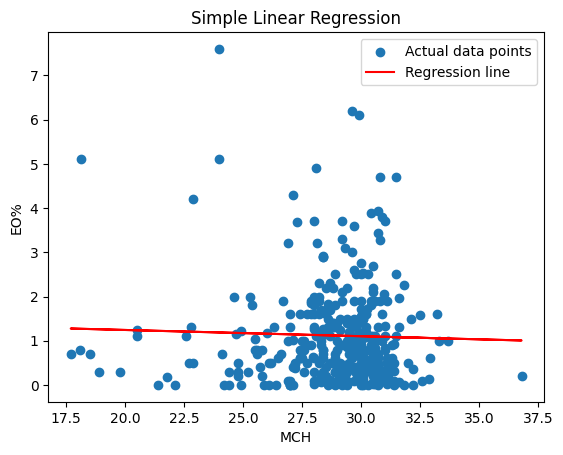

In [ ]:
# 5.1 Simple and Multiple Linear Regression
# Visual Representation of the relationship between 'MCH' and 'TYPE' using Simple Linear Regression

import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# GitHub raw URL for the CSV file
url = 'https://raw.githubusercontent.com/martuzaiu/Ovarian_Cancer_Project/main/ovariantotal.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(url)

# Simple Linear Regression
X_simple = df['MCH']
y_simple = df['EO%']

# Add a constant term to the independent variable
X_simple = sm.add_constant(X_simple)

# Fit the model
model_simple = sm.OLS(y_simple, X_simple).fit()

# Get the predicted values
predictions_simple = model_simple.predict(X_simple)

# Plotting the data points
plt.scatter(X_simple['MCH'], y_simple, label='Actual data points')

# Plotting the regression line
plt.plot(X_simple['MCH'], predictions_simple, label='Regression line', color='red')

# Adding labels and title
plt.xlabel('MCH')
plt.ylabel('EO%')
plt.title('Simple Linear Regression')

# Adding legend
plt.legend()

# Show the plot
plt.show()


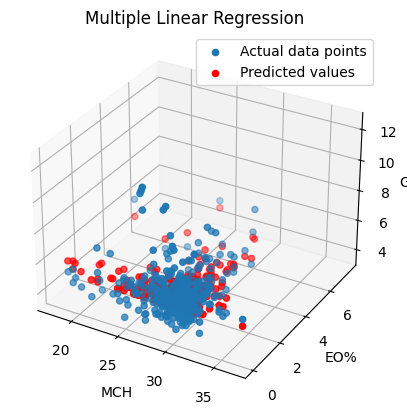

In [ ]:
# 5.1 Simple and Multiple Linear Regression
# Visual Representation of the relationship between 'MCH', 'EO%', and 'TYPE' using Multiple Linear Regression

import matplotlib.pyplot as plt
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D

# Assuming 'MCH', 'EO%' are the independent variables and 'TYPE' is the dependent variable
X_multiple = df[['MCH', 'EO%']]
y_multiple = df['GLU.']

# Add a constant term to the independent variables
X_multiple = sm.add_constant(X_multiple)

# Fit the model
model_multiple = sm.OLS(y_multiple, X_multiple).fit()

# Get the predicted values
predictions_multiple = model_multiple.predict(X_multiple)

# Plotting the 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_multiple['MCH'], X_multiple['EO%'], y_multiple, label='Actual data points')
ax.scatter(X_multiple['MCH'], X_multiple['EO%'], predictions_multiple, label='Predicted values', color='red')

# Adding labels and title
ax.set_xlabel('MCH')
ax.set_ylabel('EO%')
ax.set_zlabel('GLU.')
ax.set_title('Multiple Linear Regression')

# Adding legend
ax.legend()

# Show the plot
plt.show()


Epoch 1/10
9/9 [==============================] - 1s 31ms/step - loss: 0.7890 - accuracy: 0.5412 - val_loss: 0.6375 - val_accuracy: 0.6714
Epoch 2/10
9/9 [==============================] - 0s 8ms/step - loss: 0.5556 - accuracy: 0.7778 - val_loss: 0.5559 - val_accuracy: 0.7429
Epoch 3/10
9/9 [==============================] - 0s 6ms/step - loss: 0.4542 - accuracy: 0.8315 - val_loss: 0.4901 - val_accuracy: 0.8286
Epoch 4/10
9/9 [==============================] - 0s 6ms/step - loss: 0.3871 - accuracy: 0.8423 - val_loss: 0.4563 - val_accuracy: 0.8571
Epoch 5/10
9/9 [==============================] - 0s 6ms/step - loss: 0.3448 - accuracy: 0.8638 - val_loss: 0.4428 - val_accuracy: 0.8571
Epoch 6/10
9/9 [==============================] - 0s 6ms/step - loss: 0.3072 - accuracy: 0.8853 - val_loss: 0.4391 - val_accuracy: 0.8571
Epoch 7/10
9/9 [==============================] - 0s 8ms/step - loss: 0.2790 - accuracy: 0.8961 - val_loss: 0.4383 - val_accuracy: 0.8571
Epoch 8/10
9/9 [=================

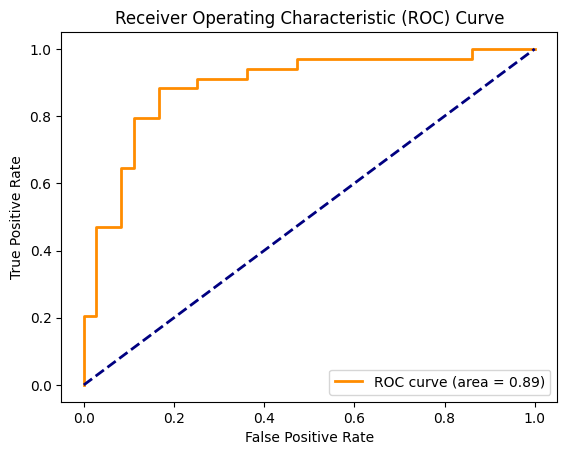

In [ ]:
# 5.2 Model Evaluation Using Visualization
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Assume you have a CSV file with features and labels
url = 'https://raw.githubusercontent.com/martuzaiu/Ovarian_Cancer_Project/main/ovariantotal.csv'
df = pd.read_csv(url)

# Assume the last column is the target variable (label)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define a simple neural network model using TensorFlow and Keras
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Make predictions on the test set
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Epoch 1/10
9/9 [==============================] - 2s 44ms/step - loss: 0.6455 - accuracy: 0.6631 - val_loss: 0.5850 - val_accuracy: 0.7000
Epoch 2/10
9/9 [==============================] - 0s 11ms/step - loss: 0.4840 - accuracy: 0.7993 - val_loss: 0.4961 - val_accuracy: 0.7714
Epoch 3/10
9/9 [==============================] - 0s 13ms/step - loss: 0.3999 - accuracy: 0.8459 - val_loss: 0.4582 - val_accuracy: 0.8429
Epoch 4/10
9/9 [==============================] - 0s 12ms/step - loss: 0.3526 - accuracy: 0.8710 - val_loss: 0.4410 - val_accuracy: 0.8429
Epoch 5/10
9/9 [==============================] - 0s 15ms/step - loss: 0.3141 - accuracy: 0.8853 - val_loss: 0.4372 - val_accuracy: 0.8429
Epoch 6/10
9/9 [==============================] - 0s 12ms/step - loss: 0.2832 - accuracy: 0.8961 - val_loss: 0.4344 - val_accuracy: 0.8571
Epoch 7/10
9/9 [==============================] - 0s 11ms/step - loss: 0.2586 - accuracy: 0.9032 - val_loss: 0.4369 - val_accuracy: 0.8429
Epoch 8/10
9/9 [===========

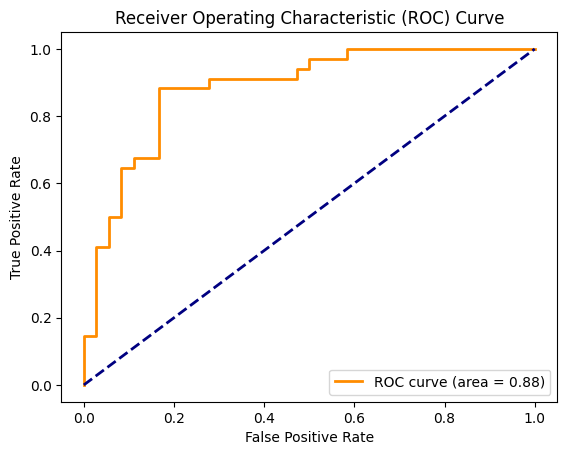

In [ ]:
# 5.2 Model Evaluation Using Visualization

import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Assume you have a CSV file with features and labels
url = 'https://raw.githubusercontent.com/martuzaiu/Ovarian_Cancer_Project/main/ovariantotal.csv'
df = pd.read_csv(url)

# Assume the last column is the target variable (label: 0 for benign, 1 for malignant)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Make predictions on the test set
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


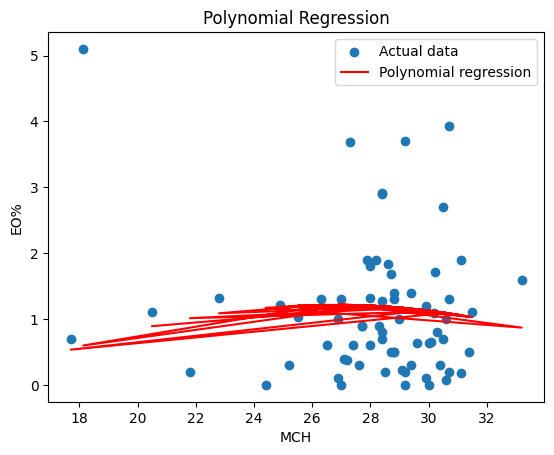

In [ ]:
# 5.3 Polynomial Regression and Pipelines
# Polynomial Regression Without Using Pipelines

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

# Assume you have a CSV file with your data
url = 'https://raw.githubusercontent.com/martuzaiu/Ovarian_Cancer_Project/main/ovariantotal.csv'
df = pd.read_csv(url)

# Assume 'MCH' is the independent variable, and 'TYPE' is the dependent variable
X = df[['MCH']].values
y = df['EO%'].values

# Reshape X to a 2D array if it's a single feature
X = X.reshape(-1, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Polynomial features transformation
degree = 2  # You can adjust the degree of the polynomial
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Linear regression on the polynomial features
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predictions on the test set
y_pred = model.predict(X_test_poly)

# Plot the results
plt.scatter(X_test, y_test, label='Actual data')
plt.plot(X_test, y_pred, label='Polynomial regression', color='red')
plt.xlabel('MCH')
plt.ylabel('EO%')
plt.title('Polynomial Regression')
plt.legend()
plt.show()


Mean Squared Error: 1.0872086509026957


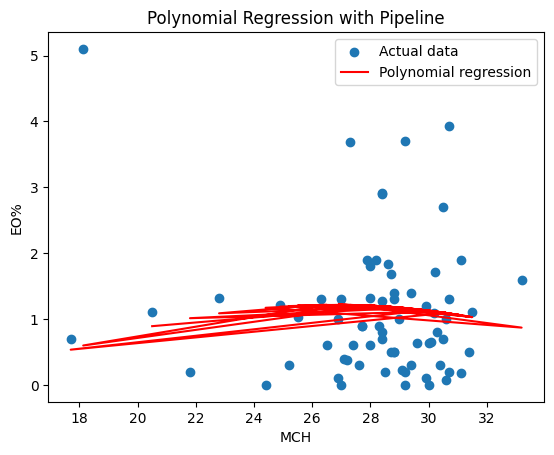

In [ ]:
# 5.3 Polynomial Regression and Pipelines
# Polynomial Regression With Pipeline

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Assume you have a CSV file with your data
url = 'https://raw.githubusercontent.com/martuzaiu/Ovarian_Cancer_Project/main/ovariantotal.csv'
df = pd.read_csv(url)

# Assume 'Age' is the independent variable, and 'CA125' is the dependent variable
X = df[['MCH']].values
y = df['EO%'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a polynomial regression pipeline
degree = 2  # You can adjust the degree of the polynomial
polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=degree)),
    ('linear_regression', LinearRegression())
])

# Fit the pipeline on the training data
polynomial_regression.fit(X_train, y_train)

# Make predictions on the test set
y_pred = polynomial_regression.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Plot the results
plt.scatter(X_test, y_test, label='Actual data')
plt.plot(X_test, y_pred, label='Polynomial regression', color='red')
plt.xlabel('MCH')
plt.ylabel('EO%')
plt.title('Polynomial Regression with Pipeline')
plt.legend()
plt.show()

R-squared (in-sample): 0.007185946772266805
Mean Squared Error (in-sample): 1.3421578953562006


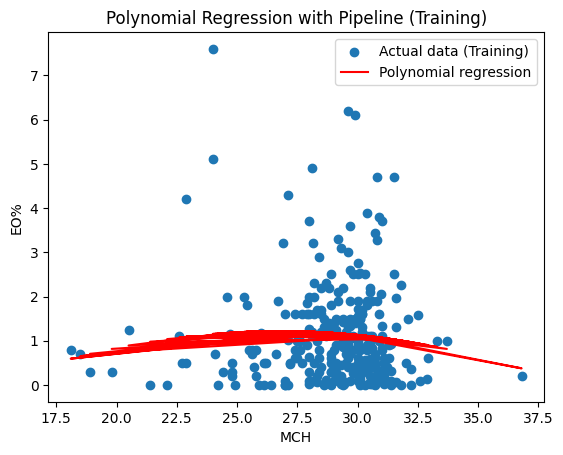

In [ ]:
# 5.4 R-Squared & MSE for In-Sample Evaluation

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assume you have a CSV file with your data
url = 'https://raw.githubusercontent.com/martuzaiu/Ovarian_Cancer_Project/main/ovariantotal.csv'
df = pd.read_csv(url)

# Assume 'Age' is the independent variable, and 'CA125' is the dependent variable
X = df[['MCH']].values
y = df['EO%'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a polynomial regression pipeline
degree = 2  # You can adjust the degree of the polynomial
polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=degree)),
    ('linear_regression', LinearRegression())
])

# Fit the pipeline on the training data
polynomial_regression.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = polynomial_regression.predict(X_train)

# Calculate R-squared and MSE for in-sample evaluation
r2_train = r2_score(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)

print("R-squared (in-sample):", r2_train)
print("Mean Squared Error (in-sample):", mse_train)

# Plot the results for the training set
plt.scatter(X_train, y_train, label='Actual data (Training)')
plt.plot(X_train, y_train_pred, label='Polynomial regression', color='red')
plt.xlabel('MCH')
plt.ylabel('EO%')
plt.title('Polynomial Regression with Pipeline (Training)')
plt.legend()
plt.show()


In [ ]:
# 5.5 Prediction & Decision-Making

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assume you have a CSV file with your data
url = 'https://raw.githubusercontent.com/martuzaiu/Ovarian_Cancer_Project/main/ovariantotal.csv'
df = pd.read_csv(url)

# Assume 'Age' is the independent variable, and 'CA125' is the dependent variable
X = df[['MCH']].values
y = df['EO%'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a polynomial regression pipeline
degree = 2  # You can adjust the degree of the polynomial
polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=degree)),
    ('linear_regression', LinearRegression())
])

# Fit the pipeline on the training data
polynomial_regression.fit(X_train, y_train)

# Make predictions on new data
new_data = np.array([30]).reshape(1, -1)  # Replace 30 with the new value you want to predict
prediction = polynomial_regression.predict(new_data)

print("Predicted EO% value:", prediction[0])

# Decision-making based on the prediction
threshold = 100  # Replace with your desired threshold
if prediction[0] > threshold:
    print("The EO% value indicates a condition above the threshold.")
    # Add additional decisions or actions based on the condition
else:
    print("The EO% value indicates a condition below the threshold.")
    # Add additional decisions or actions based on the condition


Predicted EO% value: 1.1286116703367508
The EO% value indicates a condition below the threshold.


Mean Squared Error: 1.0872086509026957
R-squared: -0.07291909832139676


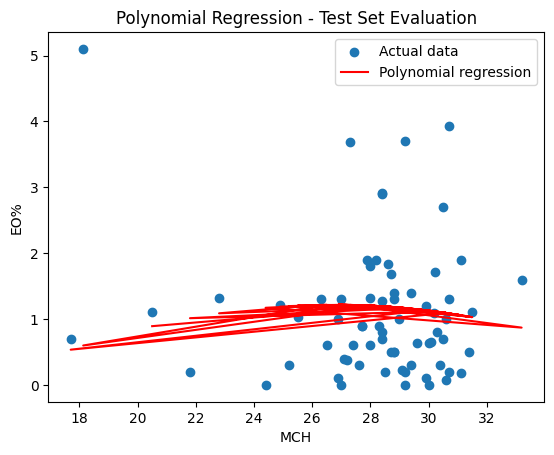

In [ ]:
# 6.1 Model Evaluation

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assume you have a CSV file with your data
url = 'https://raw.githubusercontent.com/martuzaiu/Ovarian_Cancer_Project/main/ovariantotal.csv'
df = pd.read_csv(url)

# Assume 'Age' is the independent variable, and 'CA125' is the dependent variable
X = df[['MCH']].values
y = df['EO%'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a polynomial regression pipeline
degree = 2  # You can adjust the degree of the polynomial
polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=degree)),
    ('linear_regression', LinearRegression())
])

# Fit the pipeline on the training data
polynomial_regression.fit(X_train, y_train)

# Make predictions on the test set
y_pred = polynomial_regression.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Plot the results
plt.scatter(X_test, y_test, label='Actual data')
plt.plot(X_test, y_pred, label='Polynomial regression', color='red')
plt.xlabel('MCH')
plt.ylabel('EO%')
plt.title('Polynomial Regression - Test Set Evaluation')
plt.legend()
plt.show()



Degree 1 Polynomial Regression:
Mean Squared Error: 1.011097015165276
R-squared: 0.00219217633536406


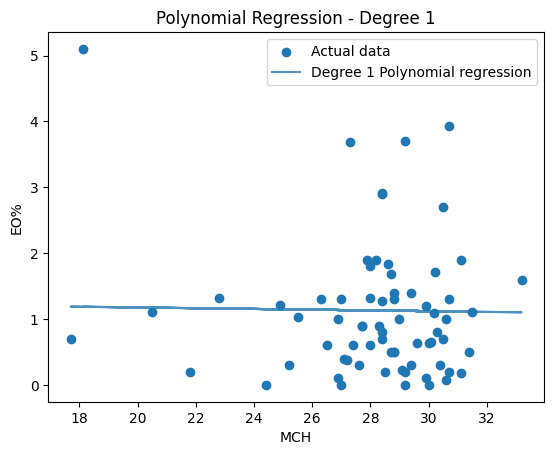


Degree 2 Polynomial Regression:
Mean Squared Error: 1.0872086509026957
R-squared: -0.07291909832139676


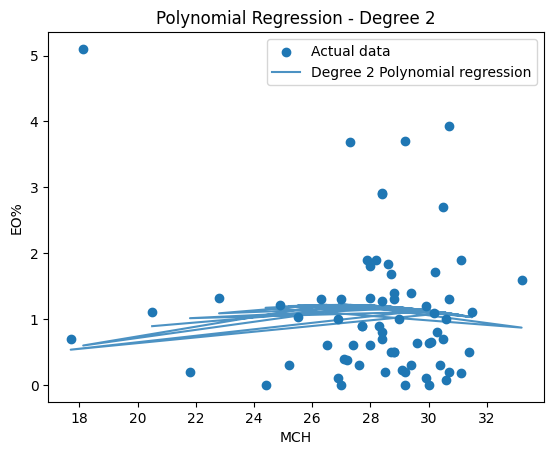


Degree 3 Polynomial Regression:
Mean Squared Error: 1.0789896177063565
R-squared: -0.064808090670043


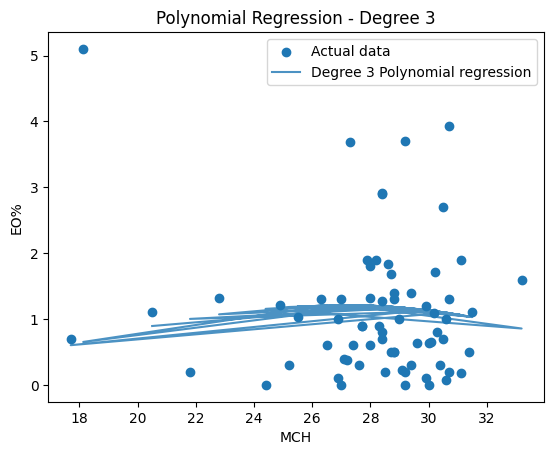


Degree 4 Polynomial Regression:
Mean Squared Error: 1.1094208136968484
R-squared: -0.09483931911533827


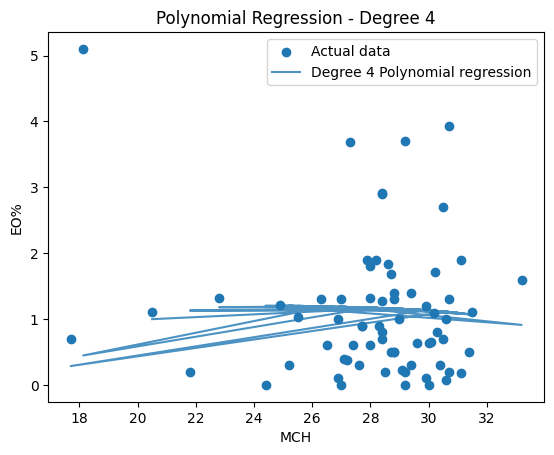


Degree 5 Polynomial Regression:
Mean Squared Error: 1.1442050369297667
R-squared: -0.12916636148745897


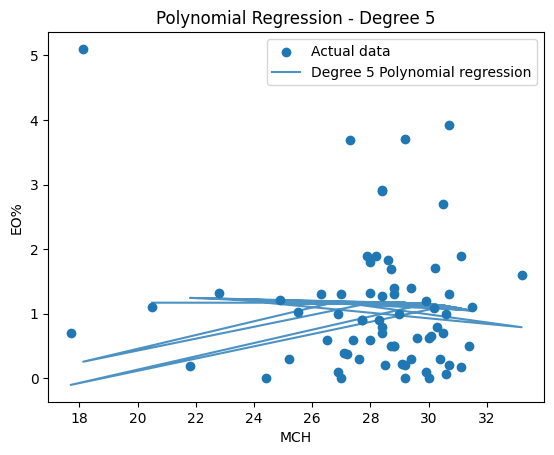

In [ ]:
# 6.2 Over-Fitting, Under-Fitting & Model Selection

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assume you have a CSV file with your data
url = 'https://raw.githubusercontent.com/martuzaiu/Ovarian_Cancer_Project/main/ovariantotal.csv'
df = pd.read_csv(url)

# Assume 'Age' is the independent variable, and 'CA125' is the dependent variable
X = df[['MCH']].values
y = df['EO%'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set up degrees for polynomial features
degrees = [1, 2, 3, 4, 5]

for degree in degrees:
    # Create a polynomial regression pipeline
    polynomial_regression = Pipeline([
        ('poly_features', PolynomialFeatures(degree=degree)),
        ('linear_regression', LinearRegression())
    ])

    # Fit the pipeline on the training data
    polynomial_regression.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = polynomial_regression.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"\nDegree {degree} Polynomial Regression:")
    print("Mean Squared Error:", mse)
    print("R-squared:", r2)

    # Plot the results
    plt.scatter(X_test, y_test, label='Actual data')
    plt.plot(X_test, y_pred, label=f'Degree {degree} Polynomial regression', alpha=0.8)
    plt.xlabel('MCH')
    plt.ylabel('EO%')
    plt.title(f'Polynomial Regression - Degree {degree}')
    plt.legend()
    plt.show()



Ridge Regression with Alpha=0.01:
Mean Squared Error: 1.0110971252429677
R-squared: 0.0021920677044610093


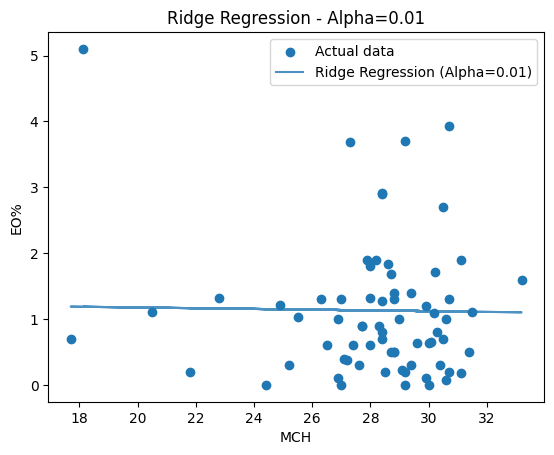


Ridge Regression with Alpha=0.1:
Mean Squared Error: 1.0110981156177523
R-squared: 0.0021910903465084397


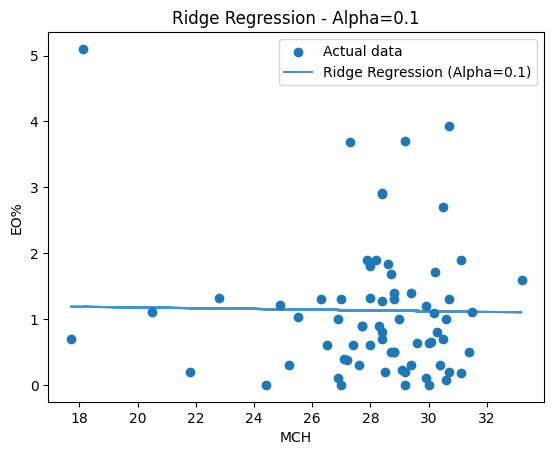


Ridge Regression with Alpha=1:
Mean Squared Error: 1.011107987350032
R-squared: 0.0021813483617593166


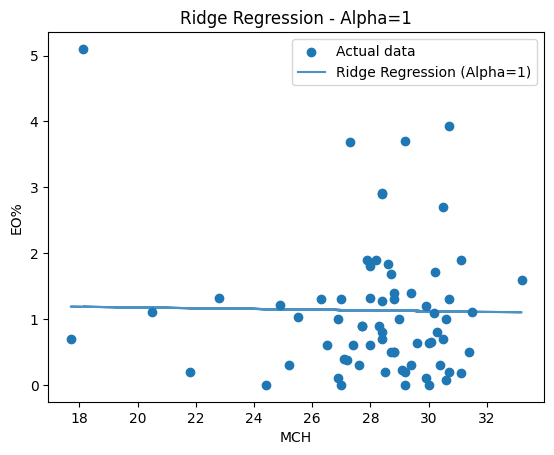


Ridge Regression with Alpha=10:
Mean Squared Error: 1.0112036037339174
R-squared: 0.002086988696484382


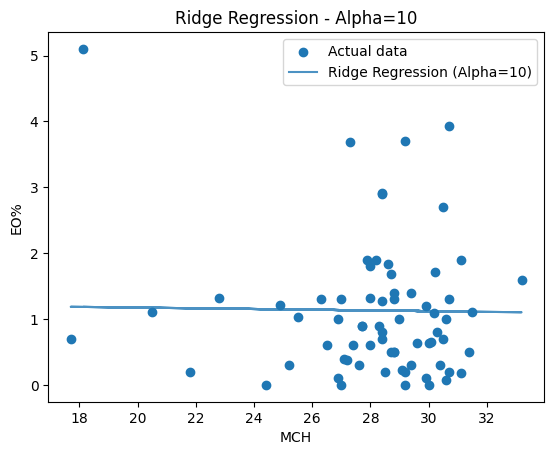


Ridge Regression with Alpha=100:
Mean Squared Error: 1.0119257683603513
R-squared: 0.0013743157250269977


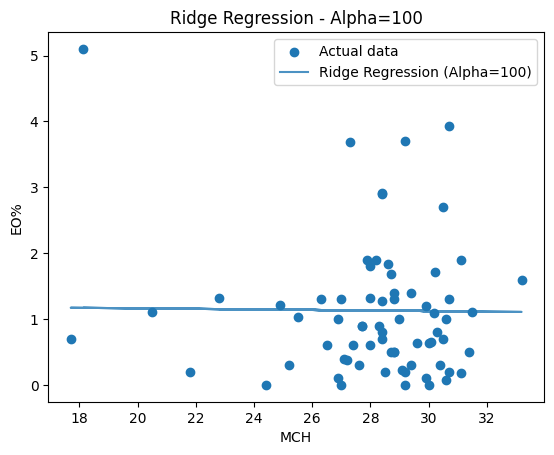

In [ ]:
# 6.3 Ridge Regression

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assume you have a CSV file with your data
url = 'https://raw.githubusercontent.com/martuzaiu/Ovarian_Cancer_Project/main/ovariantotal.csv'
df = pd.read_csv(url)

# Assume 'Age' is the independent variable, and 'CA125' is the dependent variable
X = df[['MCH']].values
y = df['EO%'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for Ridge Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Set up alpha values for Ridge Regression
alphas = [0.01, 0.1, 1, 10, 100]

for alpha in alphas:
    # Create Ridge Regression model
    ridge_model = Ridge(alpha=alpha)

    # Fit the model on the scaled training data
    ridge_model.fit(X_train_scaled, y_train)

    # Make predictions on the scaled test set
    y_pred = ridge_model.predict(X_test_scaled)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"\nRidge Regression with Alpha={alpha}:")
    print("Mean Squared Error:", mse)
    print("R-squared:", r2)

    # Plot the results
    plt.scatter(X_test, y_test, label='Actual data')
    plt.plot(X_test, y_pred, label=f'Ridge Regression (Alpha={alpha})', alpha=0.8)
    plt.xlabel('MCH')
    plt.ylabel('EO%')
    plt.title(f'Ridge Regression - Alpha={alpha}')
    plt.legend()
    plt.show()


Best Alpha: 100

Best Model Evaluation:
Mean Squared Error: 1.0119257683603513
R-squared: 0.0013743157250269977


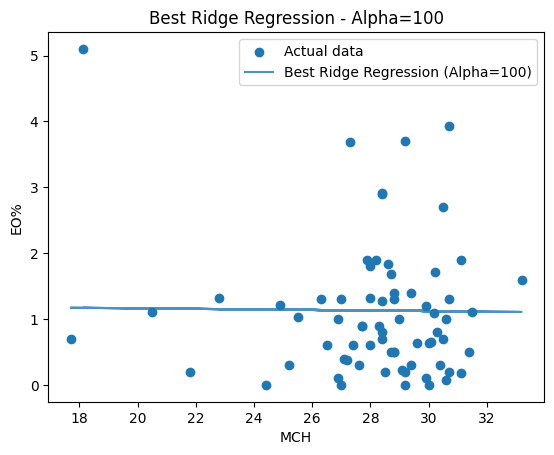

In [ ]:
# 6.4 Grid Search

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assume you have a CSV file with your data
url = 'https://raw.githubusercontent.com/martuzaiu/Ovarian_Cancer_Project/main/ovariantotal.csv'
df = pd.read_csv(url)

# Assume 'Age' is the independent variable, and 'CA125' is the dependent variable
X = df[['MCH']].values
y = df['EO%'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for Ridge Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Set up alpha values for Ridge Regression
alphas = [0.01, 0.1, 1, 10, 100]

# Create a Ridge Regression model
ridge_model = Ridge()

# Set up the parameter grid for grid search
param_grid = {'alpha': alphas}

# Create the GridSearchCV object
grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search on the scaled training data
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters from the grid search
best_alpha = grid_search.best_params_['alpha']

# Print the best hyperparameters
print("Best Alpha:", best_alpha)

# Make predictions on the scaled test set using the best model
y_pred = grid_search.predict(X_test_scaled)

# Evaluate the best model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nBest Model Evaluation:")
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Plot the results
plt.scatter(X_test, y_test, label='Actual data')
plt.plot(X_test, y_pred, label=f'Best Ridge Regression (Alpha={best_alpha})', alpha=0.8)
plt.xlabel('MCH')
plt.ylabel('EO%')
plt.title(f'Best Ridge Regression - Alpha={best_alpha}')
plt.legend()
plt.show()



Refined Ridge Regression Model:
Best Alpha: 0.01
Mean Squared Error: 1.0110971252429677
R-squared: 0.0021920677044610093


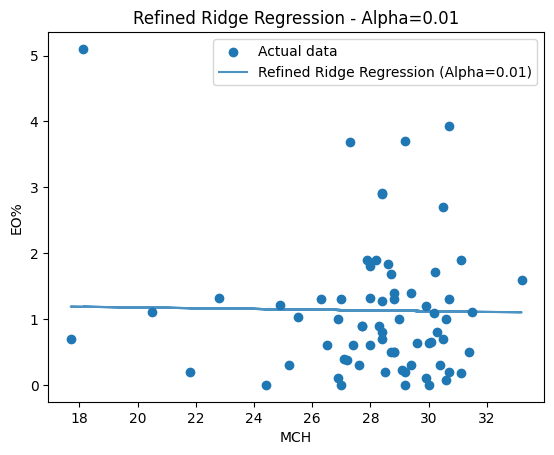

In [ ]:
# 6.5 Model Refinement

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assume you have a CSV file with your data
url = 'https://raw.githubusercontent.com/martuzaiu/Ovarian_Cancer_Project/main/ovariantotal.csv'
df = pd.read_csv(url)

# Assume 'Age' is the independent variable, and 'CA125' is the dependent variable
X = df[['MCH']].values
y = df['EO%'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for Ridge Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Refine the Ridge Regression model based on grid search results
best_alpha = 0.01  # Replace with the best alpha value obtained from grid search

# Create the refined Ridge Regression model
refined_ridge_model = Ridge(alpha=best_alpha)

# Fit the refined model on the scaled training data
refined_ridge_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test set
y_pred = refined_ridge_model.predict(X_test_scaled)

# Evaluate the refined model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nRefined Ridge Regression Model:")
print("Best Alpha:", best_alpha)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


# Plot the results
plt.scatter(X_test, y_test, label='Actual data')
plt.plot(X_test, y_pred, label=f'Refined Ridge Regression (Alpha={best_alpha})', alpha=0.8)
plt.xlabel('MCH')
plt.ylabel('EO%')
plt.title(f'Refined Ridge Regression - Alpha={best_alpha}')
plt.legend()
plt.show()


In [ ]:
# Set a threshold for classification
threshold = 0.5

# Convert the regression predictions to binary outcomes
y_pred_binary = (y_pred >= threshold).astype(int)

# Convert the actual outcomes to binary
y_test_binary = (y_test >= threshold).astype(int)

# Calculate accuracy
accuracy = np.mean(y_pred_binary == y_test_binary)

print("\nAccuracy:", accuracy)



Accuracy: 0.7285714285714285
